In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [15]:
# Step 1: Data Loading and Cleaning
data = pd.read_csv("La Petit Bakery.csv")

In [16]:
# Step 3: Data Analysis
# Descriptive Statistics
data.describe()

,Sr.,Cakes,Pies,Cookies,Smoothies,Coffee
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,80.955556,50.544444,523.100000,175.711111,381.311111
std,26.124701,18.701626,12.041278,137.882384,50.647325,104.551868
min,1.000000,44.000000,16.000000,222.000000,60.000000,156.000000
25%,23.250000,67.000000,43.000000,421.000000,140.250000,305.000000
50%,45.500000,79.000000,50.000000,519.000000,171.500000,376.000000
75%,67.750000,93.000000,57.750000,601.750000,207.500000,455.000000
max,90.000000,128.000000,84.000000,922.000000,291.000000,630.000000


In [17]:
# Check for non-numeric values
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Day', 'Promotion'], dtype='object')


In [18]:
# Drop non-numeric columns or handle them appropriately
# For example, if 'Promotion' contains non-numeric values, you may need to encode it before dropping
data = data.drop(columns=non_numeric_cols)

In [19]:
data.describe()

,Sr.,Cakes,Pies,Cookies,Smoothies,Coffee
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,80.955556,50.544444,523.100000,175.711111,381.311111
std,26.124701,18.701626,12.041278,137.882384,50.647325,104.551868
min,1.000000,44.000000,16.000000,222.000000,60.000000,156.000000
25%,23.250000,67.000000,43.000000,421.000000,140.250000,305.000000
50%,45.500000,79.000000,50.000000,519.000000,171.500000,376.000000
75%,67.750000,93.000000,57.750000,601.750000,207.500000,455.000000
max,90.000000,128.000000,84.000000,922.000000,291.000000,630.000000


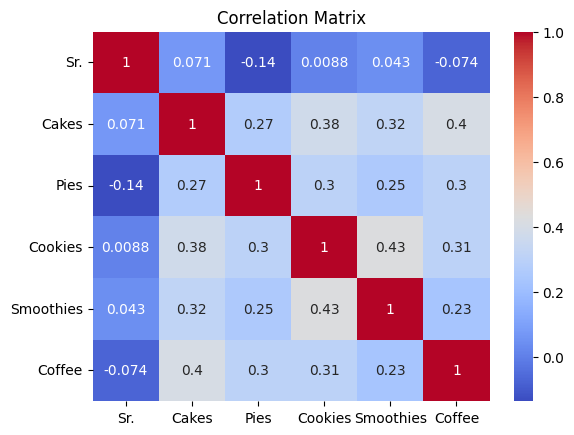

In [20]:
# Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

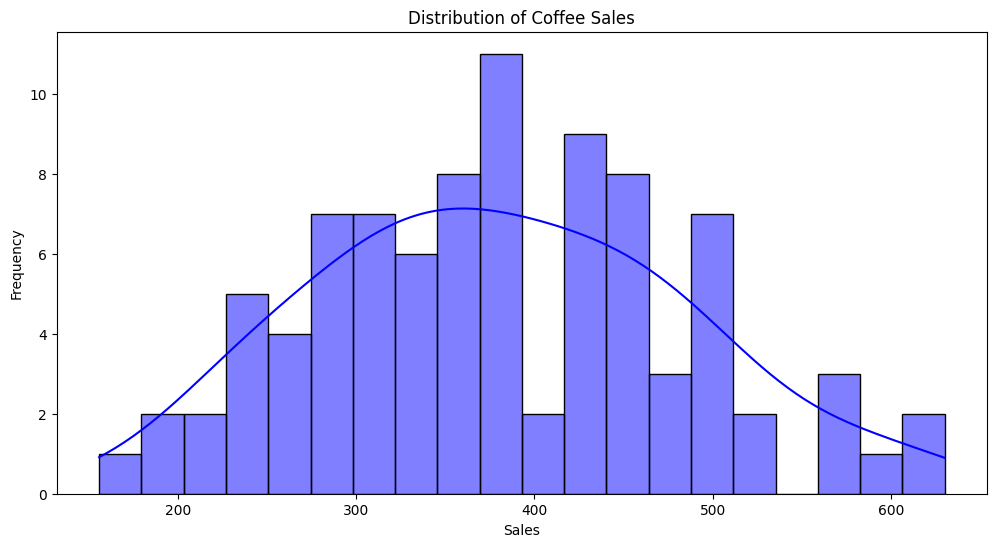

In [21]:
# Step 4: Data Visualization
# Univariate Analysis - Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Coffee'], kde=True, color='blue', bins=20)
plt.title('Distribution of Coffee Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

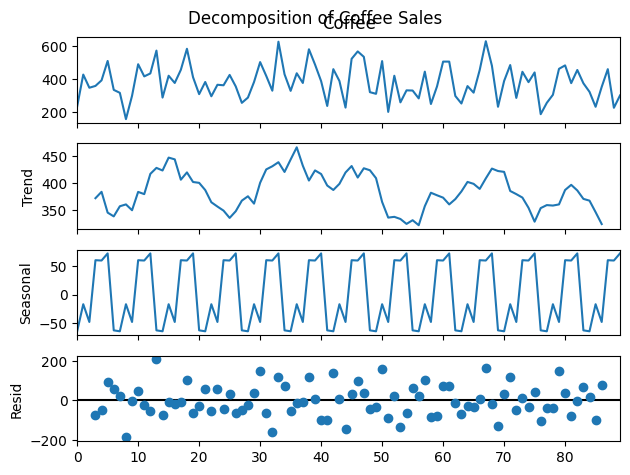

In [24]:
# Time Series Analysis - Decomposition
coffee_sales = data['Coffee']
decomposition = seasonal_decompose(coffee_sales, model='additive', period=7)
decomposition.plot()
plt.suptitle('Decomposition of Coffee Sales')
plt.show()

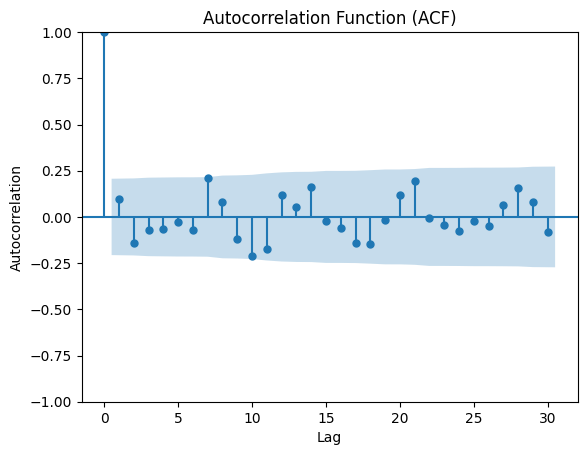

In [25]:
# Autocorrelation and Partial Autocorrelation
plot_acf(coffee_sales, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

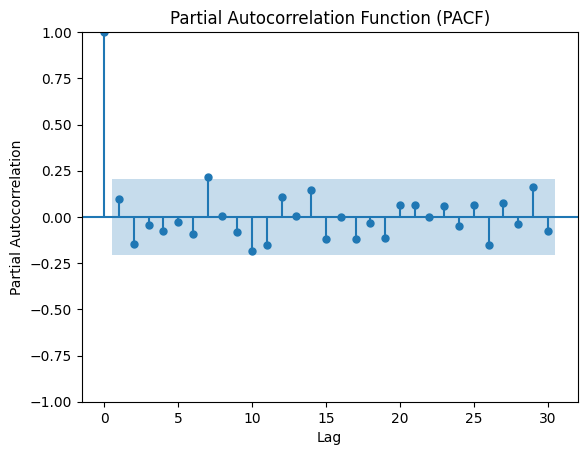

In [26]:
plot_pacf(coffee_sales, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [27]:
# Step 5: Forecasting
# Train-test Split
train_size = int(len(coffee_sales) * 0.8)
train_data, test_data = coffee_sales.iloc[:train_size], coffee_sales.iloc[train_size:]


In [28]:
# ARIMA Model
model = ARIMA(train_data, order=(1,1,1))
fit_model = model.fit()


In [30]:
# Forecasting
forecast_steps = len(test_data)
forecast = fit_model.forecast(steps=forecast_steps)

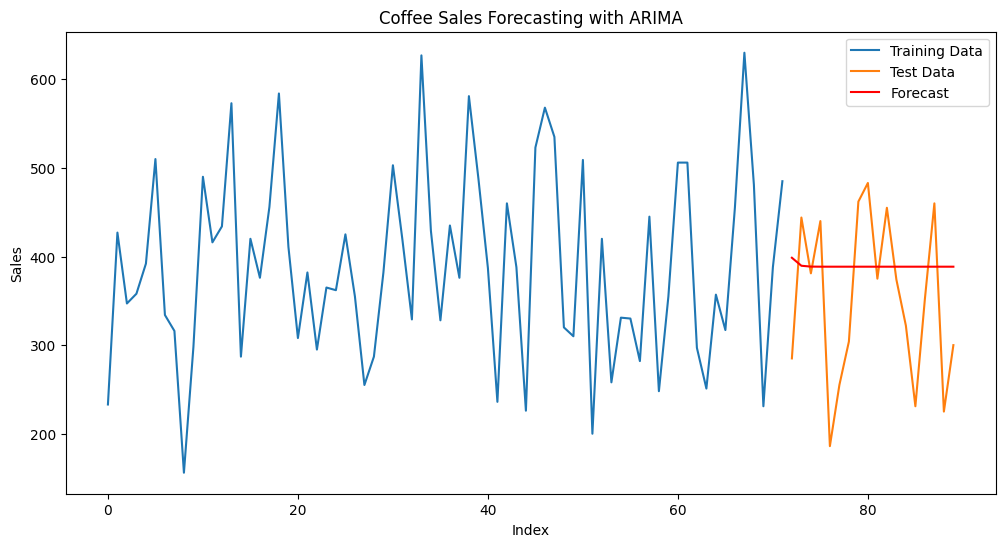

In [31]:
# Plotting Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Coffee Sales Forecasting with ARIMA')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [32]:
# Step 6: Model Evaluation
# Calculate Mean Absolute Error
mae = np.mean(np.abs(test_data.values - forecast))
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 83.01356505619282
